# Assignment SkyGeni

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading finance data
df_finance = pd.read_csv('finanical_information.csv', index_col = 0, dtype = {"inflation_rate": float, "gdp_growth_rate": float}, parse_dates = ["start_date", "end_date"])
df_finance.head(2)

,start_date,end_date,inflation_rate,gdp_growth_rate
0,2018-01-01,2018-03-31,5.77,3.51
1,2018-04-01,2018-06-30,1.17,2.15


In [3]:
# check the data types of finance dataframe
df_finance.dtypes

start_date         datetime64[ns]
end_date           datetime64[ns]
inflation_rate            float64
gdp_growth_rate           float64
dtype: object

In [4]:
# reading client data
df_clients = pd.read_csv("industry_client_details.csv")
df_clients.head(2)

,client_id,company_size,industry,location
0,4280387012,Large,Finance Lending,Mumbai
1,2095513148,Small,Finance Lending,Chennai


In [5]:
# check the data types of finance dataframe
df_clients.dtypes

client_id        int64
company_size    object
industry        object
location        object
dtype: object

In [6]:
# function to create standard date format column (yyyy-mm-dd) from following date format - mm/dd/yyyy
def convert_date(x):
    return pd.to_datetime(x, format='%m/%d/%Y')

In [7]:
# reading payment data
df_payments = pd.read_csv("payment_information.csv", converters = {"payment_date": convert_date})
df_payments.head(2)

,client_id,payment_date,amount_paid,payment_method
0,6292156167,2019-09-16,447.0,Bank Transfer
1,7462725203,2018-05-21,379.7,Bank Transfer


In [8]:
# check the data types of payment dataframe
df_payments.dtypes

client_id                  int64
payment_date      datetime64[ns]
amount_paid              float64
payment_method            object
dtype: object

In [9]:
# reading subscription data
df_subscription = pd.read_csv("subscription_information.csv", parse_dates= ["start_date", "end_date"])
df_subscription.head(2)

,client_id,subscription_type,start_date,end_date,renewed
0,1131383004,Yearly,2020-11-11,2021-11-11,False
1,4309371709,Monthly,2021-05-24,2021-06-23,True


In [10]:
# check the data types of subscription dataframe
df_subscription.dtypes

client_id                     int64
subscription_type            object
start_date           datetime64[ns]
end_date             datetime64[ns]
renewed                        bool
dtype: object

In [11]:
# chcking the null columns in finance dataframe
print(df_finance.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   start_date       21 non-null     datetime64[ns]
 1   end_date         21 non-null     datetime64[ns]
 2   inflation_rate   21 non-null     float64       
 3   gdp_growth_rate  21 non-null     float64       
dtypes: datetime64[ns](2), float64(2)
memory usage: 840.0 bytes
None


In [12]:
# chcking the null columns in clients dataframe
print(df_clients.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   client_id     100 non-null    int64 
 1   company_size  100 non-null    object
 2   industry      100 non-null    object
 3   location      100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB
None


In [13]:
# chcking the null columns in payments dataframe
print(df_payments.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   client_id       100 non-null    int64         
 1   payment_date    100 non-null    datetime64[ns]
 2   amount_paid     100 non-null    float64       
 3   payment_method  100 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.3+ KB
None


In [14]:
# chcking the null columns in subscription dataframe
print(df_subscription.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   client_id          100 non-null    int64         
 1   subscription_type  100 non-null    object        
 2   start_date         100 non-null    datetime64[ns]
 3   end_date           100 non-null    datetime64[ns]
 4   renewed            100 non-null    bool          
dtypes: bool(1), datetime64[ns](2), int64(1), object(1)
memory usage: 3.4+ KB
None


In [15]:
# glance of finance data
print(df_finance.describe())

                          start_date             end_date  inflation_rate  \
count                             21                   21       21.000000   
mean   2020-07-01 05:42:51.428571392  2020-09-25 08:00:00        4.426667   
min              2018-01-01 00:00:00  2018-03-31 00:00:00        0.760000   
25%              2019-04-01 00:00:00  2019-06-30 00:00:00        2.710000   
50%              2020-07-01 00:00:00  2020-09-30 00:00:00        4.400000   
75%              2021-10-01 00:00:00  2021-12-31 00:00:00        6.760000   
max              2023-01-01 00:00:00  2023-01-03 00:00:00        7.710000   
std                              NaN                  NaN        2.245801   

       gdp_growth_rate  
count        21.000000  
mean          2.345238  
min           1.040000  
25%           1.360000  
50%           2.400000  
75%           3.440000  
max           3.630000  
std           0.952747  


In [16]:
# glance of payments data
print(df_payments.describe())

          client_id         payment_date  amount_paid
count  1.000000e+02                  100   100.000000
mean   5.663055e+09  2020-07-15 04:19:12   287.269000
min    1.077709e+09  2018-02-10 00:00:00    61.100000
25%    3.778644e+09  2019-06-08 18:00:00   191.050000
50%    5.508879e+09  2020-08-09 00:00:00   286.400000
75%    7.571385e+09  2021-09-12 00:00:00   411.225000
max    9.842415e+09  2022-12-20 00:00:00   494.600000
std    2.429520e+09                  NaN   133.599908


In [17]:
# glance of subscription data
print(df_subscription.describe())

          client_id           start_date             end_date
count  1.000000e+02                  100                  100
mean   5.663055e+09  2020-07-15 04:19:12  2021-01-05 05:31:12
min    1.077709e+09  2018-02-10 00:00:00  2018-04-03 00:00:00
25%    3.778644e+09  2019-06-08 18:00:00  2019-09-29 18:00:00
50%    5.508879e+09  2020-08-09 00:00:00  2021-01-06 12:00:00
75%    7.571385e+09  2021-09-12 00:00:00  2022-01-22 00:00:00
max    9.842415e+09  2022-12-20 00:00:00  2023-12-20 00:00:00
std    2.429520e+09                  NaN                  NaN


##### As boxplot is the easiest way to identify outliers, it used

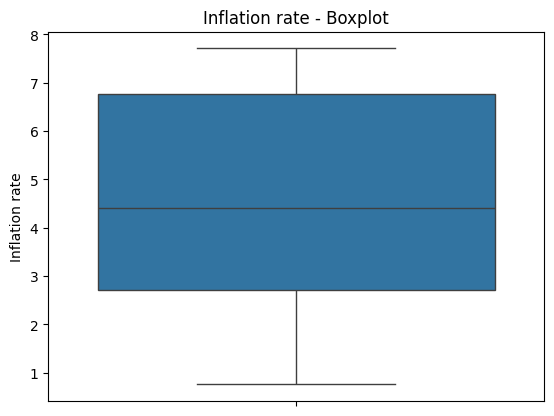

In [18]:
sns.boxplot(df_finance['inflation_rate'])
plt.ylabel('Inflation rate')
plt.title('Inflation rate - Boxplot', fontsize = 12)
plt.show()

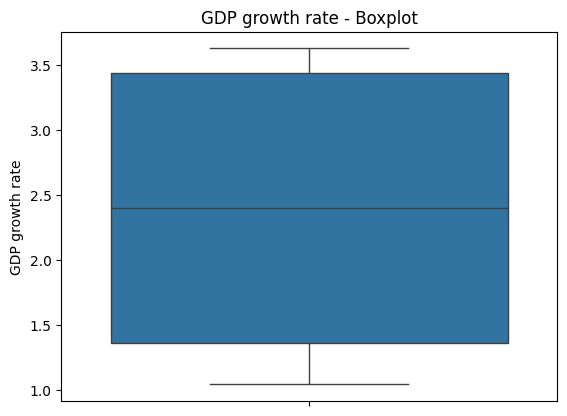

In [19]:
sns.boxplot(df_finance['gdp_growth_rate'])
plt.ylabel('GDP growth rate')
plt.title('GDP growth rate - Boxplot', fontsize = 12)
plt.show()

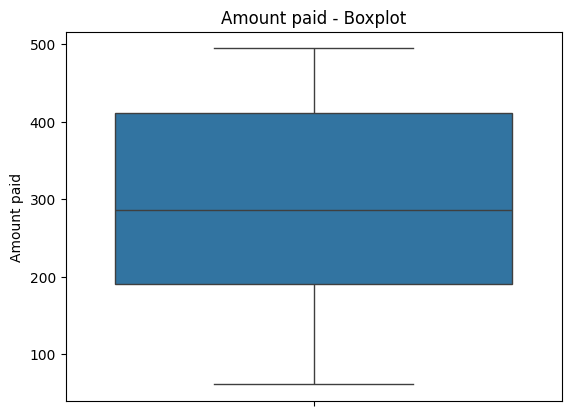

In [20]:
sns.boxplot(df_payments['amount_paid'])
plt.ylabel('Amount paid')
plt.title('Amount paid - Boxplot', fontsize = 12)
plt.show()

### check for duplicated records

In [21]:
print(df_finance.duplicated().sum())

0


In [22]:
print(df_clients.duplicated().sum())

0


In [23]:
print(df_payments.duplicated().sum())

0


In [24]:
print(df_subscription.duplicated().sum())

0


# 1. How many finance lending and blockchain clients does the organization have?

In [25]:
# for our knowledge - how many , and who are the clients the organization have.
print(df_clients['industry'].unique())

['Finance Lending' 'Block Chain' 'Hyper Local' 'AI' 'Gaming']


In [26]:
# Possible scenario: We can categorize them as follows
# 1. Currently active(renewed) clients
# 2. Previous clients

### Current clients

In [27]:
df_subscription['end_date'].describe()

count                    100
mean     2021-01-05 05:31:12
min      2018-04-03 00:00:00
25%      2019-09-29 18:00:00
50%      2021-01-06 12:00:00
75%      2022-01-22 00:00:00
max      2023-12-20 00:00:00
Name: end_date, dtype: object

##### We have past records only.

### Past clients

In [28]:
# Filter only Finance Lending and Block Chain industry and count the unique clients
print(len(df_clients[(df_clients['industry'] == 'Finance Lending') | (df_clients['industry'] == 'Block Chain')]['client_id'].unique()))

47


### The Organization have 47 finance lending and blockchain clients.

---

# 2.	Which industry in the organization has the highest renewal rate?

In [29]:
df_subscription['renewed'].value_counts()

renewed
True     55
False    45
Name: count, dtype: int64

In [30]:
# create a new dataframe only with subscription renewed data
df_subscription_renewed = df_subscription[df_subscription['renewed'] == True]

In [31]:
# create a new dataframe by joining clients dataframe and subscription renewed dataframe
df_org_renewel = pd.merge(df_clients, df_subscription_renewed, how = 'inner', on = 'client_id')
df_org_renewel.head(2)

,client_id,company_size,industry,location,subscription_type,start_date,end_date,renewed
0,4280387012,Large,Finance Lending,Mumbai,Yearly,2022-11-25,2023-11-25,True
1,7225516707,Medium,Finance Lending,New Delhi,Yearly,2021-01-19,2022-01-19,True


In [32]:
# for our knowledge checking all the industry and their renewel rate
df_org_renewel['industry'].value_counts()

industry
Gaming             16
Finance Lending    12
Block Chain        11
Hyper Local         9
AI                  7
Name: count, dtype: int64

In [33]:
# filter only the top industry which having highest renewel rate
df_org_renewel['industry'].value_counts().head(1)

industry
Gaming    16
Name: count, dtype: int64

### Gaming industry in the organization has the highest renewal rate - 16 renewels

---

# 3.	What was the average inflation rate when their subscriptions were renewed?

In [34]:
# to get the starting quarter month of subscription renewed for gaming industry
df_org_gaming = df_org_renewel[df_org_renewel['industry'] == 'Gaming']
df_org_gaming['quarter_start_date'] = df_org_gaming['start_date'].dt.to_period('Q').dt.start_time
df_org_gaming['year'] = df_org_gaming['quarter_start_date'].dt.year
df_org_gaming['month'] = df_org_gaming['quarter_start_date'].dt.month
df_org_gaming.head(2)

,client_id,company_size,industry,location,subscription_type,start_date,end_date,renewed,quarter_start_date,year,month
9,3758633299,Large,Gaming,Banglore,Monthly,2021-04-24,2021-05-24,True,2021-04-01,2021,4
12,5443254615,Medium,Gaming,New Delhi,Yearly,2020-06-25,2021-06-25,True,2020-04-01,2020,4


In [35]:
# extracting year, and month from finance dataframe and create a new column
df_finance['year'] = df_finance['start_date'].dt.year
df_finance['month'] = df_finance['start_date'].dt.month
df_finance.head(2)

,start_date,end_date,inflation_rate,gdp_growth_rate,year,month
0,2018-01-01,2018-03-31,5.77,3.51,2018,1
1,2018-04-01,2018-06-30,1.17,2.15,2018,4


In [36]:
# join subscription renewed for gaming dataframe with finance dataframe
df_avg_gaming_inflation = pd.merge(df_org_gaming, df_finance, how = 'left', on = ['year', 'month'])
df_avg_gaming_inflation.head(2)

,client_id,company_size,industry,location,subscription_type,start_date_x,end_date_x,renewed,quarter_start_date,year,month,start_date_y,end_date_y,inflation_rate,gdp_growth_rate
0,3758633299,Large,Gaming,Banglore,Monthly,2021-04-24,2021-05-24,True,2021-04-01,2021,4,2021-04-01,2021-06-30,0.76,3.63
1,5443254615,Medium,Gaming,New Delhi,Yearly,2020-06-25,2021-06-25,True,2020-04-01,2020,4,2020-04-01,2020-06-30,4.69,1.23


In [37]:
df_avg_gaming_inflation['inflation_rate'].mean()

4.59

### Gaming industry's average inflation rate was 4.59 when their subscriptions were renewed

---

# 4.	What is the median amount paid each year for all payment methods? 

In [38]:
# extract year from payment year column and create a new column
df_payments['payment_year'] = df_payments['payment_date'].dt.year
df_payments.head(2)

,client_id,payment_date,amount_paid,payment_method,payment_year
0,6292156167,2019-09-16,447.0,Bank Transfer,2019
1,7462725203,2018-05-21,379.7,Bank Transfer,2018


In [39]:
# for our knowledge - check the unique payment method the data have
df_payments['payment_method'].unique()

array(['Bank Transfer', 'Check', 'Credit Card'], dtype=object)

In [40]:
# calculating median value for each year, for each payment method
df_payments.groupby(['payment_year', 'payment_method'])['amount_paid'].median()

payment_year  payment_method
2018          Bank Transfer     281.65
              Check             216.60
              Credit Card       229.15
2019          Bank Transfer     184.20
              Check             410.20
              Credit Card       401.90
2020          Bank Transfer     225.10
              Check             413.10
              Credit Card       285.25
2021          Bank Transfer     255.30
              Check             435.10
              Credit Card       208.70
2022          Bank Transfer     196.50
              Check             275.50
              Credit Card       326.20
Name: amount_paid, dtype: float64

---